MD RAKIB AHSAN

> 2016331039



#**A program to simulate the analog-digital signal using Pulse Code Modulation**



> Pulse-code modulation (PCM) is a method used to digitally represent sampled analog signals. It is the standard form of digital audio in computers, compact discs, digital telephony and other digital audio applications. In a PCM stream, the amplitude of the analog signal is sampled regularly at uniform intervals, and each sample is quantized to the nearest value within a range of digital steps.



1.   The analog signal is sampled.
1.   The sampled signal is quantized.
2.   The quantized values are encoded as streams of bits.







In [1]:
#2016331039
import numpy as np
import matplotlib.pyplot as plt
import math

The signal we're going to work with has following equation

> v(t)=Acos( 2 unknown character f t)



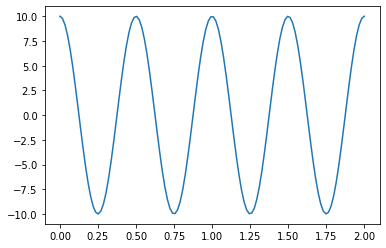

In [2]:
A = 10                        
f = 2
T = 1 / f
t = np.linspace(0, 2.0, 120)
x = A * np.cos(2.0 * np.pi * f * t)
plt.plot(t, x)
plt.show()



*   Process 1- **Sampling**


> Recording an analog signal at evenly spaced instants in time creates samples.

> Sampling is the process of recording an analog signal at regular discrete moments of time.The sampling rate $fs$ is the number of samples per second. The time interval between samples is called the sampling interval $Ts=1/fs$.

If a signal $v(t)=cos(2πft)$ is uniormly sampled at $n$ (number of sample per interval) over a time period $T$, then the sampling interval $Ts=T/n$ and the sampling rate $fs=nf$.$$Ts = T/n = 1/nf$$$$Ts = 1/fs$$$$fs = nf$$

The sampled signal of the analog signal $v(t)$ is expressed by $v[n]$, where $n$ is the index of the samples.

When $n=0$ sample is taken from the $t=0$ time point of the analog signal When $n=1$ sample must come from the $t=Ts$ time point, because $Ts$ is the sampling interval.

So, the sequence of samples can be written as $v[0]=v(0)$, $v[1]=v(Ts)$, $v[2]=v(2Ts)$, and so on.

So,$$v[n]=v(nTs)$$










/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


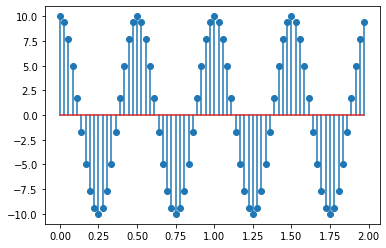

In [3]:
n = 18
fs = n * f
ts=np.arange(0, 2, 1 / fs)
xs=A*np.cos(2*np.pi*f*ts);
# xs Sampled signal 
plt.stem(ts, xs)
plt.show()



*   Process 2 - **Quantization**

> Quantizing samples to levels and then to sequences of bits leads to quantization error.

> The result of sampling is a series of pulses with amplitude values between the maximum and minimum amplitudes of the signal. Because of the sampled values can potentially take on a continuous range of values, these values cannot be used in the encoding process.

In analog to digital conversion, each sample value is mapped to a discrete level (represented by a sequence of bits). This is known as the Quantization process.

In a $B-bit$ quantizer, each quantization level is represented with $B$ bits, so that the number of levels equals $L = 2^B$

The following are the steps in quantization:

We assume that the original analog signal has instantaneous amplitudes between $Vmin$ and $Vmax$
We divide the amplitude range into L zones, each of height $\Delta$ (delta).$$\Delta = \frac{Vmax - Vmin}{L}$$
We assign quantized values of 0 to $L - 1$ to the midpoint of each level zone.
We approximate the value of the sample amplitude to the quantized values.
If we decide to have eight levels (b-bit = 3, L = 8, height = $\Delta$), then our partitioned amplitude will be from $-4\Delta$ to $4\Delta$.

As the quantized value is the midpoint of each level zone,

the value between $4\Delta$ and $3\Delta$ will be quantized into their midpoint, $3\Delta$+${\Delta/2}$, also assigned the encode value 7.
the value between $3\Delta$ and $3\Delta$ will be quantized into their midpoint, $2\Delta$+${\Delta/2}$, also assigned the encode value 6. and so on...




**To find midpoint of each level zone(for assigning these midpoint as quantized value):**




1.   Partition/divide the amplitude range with height $\Delta$
2.   Decrease each of the parition value by ${\Delta/2}$ (called codebook)

1.   Assign the numbers in each interval of the codebook to the corresponding partition number(quantized value).
2.   To make quantize value inbetween the levels, increased each quantized value by ${\Delta/2}$






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


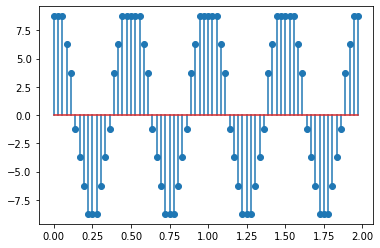

In [4]:
b_bit = 3
L = 2 ** b_bit
vmax=A;
vmin=-vmax;
delta=(vmax-vmin)/L;
partition = np.arange(vmin, vmax, delta)
codebook= np.arange(vmin-(delta/2),vmax+(delta/2), delta) 

xq = np.copy(xs)
encode = np.copy(xs)

for i in range(len(partition)):
  left = codebook[i]
  right = codebook[i + 1]
  for j in range(len(xs)):
    # left <= xs[i] < right
    if(i != len(partition) - 1 and left <= xs[j] and xs[j] < right):
      xq[j] = partition[i]
      encode[j] = i
    # left <= xs[i], only for last portion
    if(i == len(partition) - 1 and left <= xs[j]):
      xq[j] = partition[i]
      encode[j] = i

for i in range(len(xq)):
    xq[i] = xq[i] + (delta / 2) 

plt.stem(ts, xq)
plt.show()

Process 3 - **Encoding**

1.   Convert the assigned decimal codec to the binary codec

1.   Append all the binary codec into an array of 0 and 1.
2.   plot a step graph





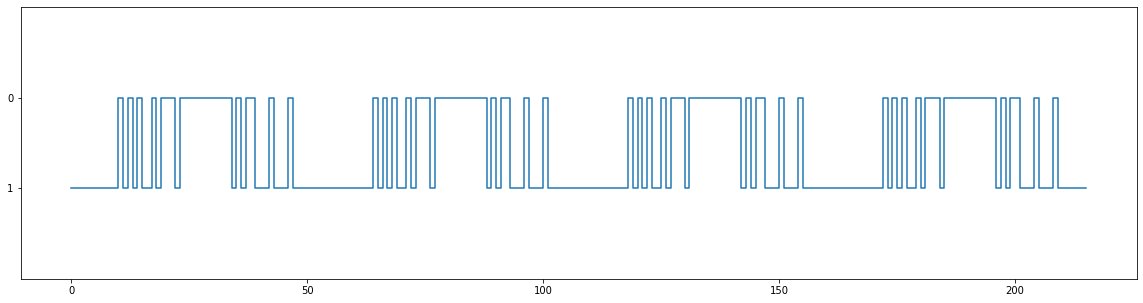

In [5]:
def decimalToBinary(val, bit):
    binary = "{0:b}".format(int(val))
    if(len(binary) > bit):
      return binary
    extra_zero = bit - len(binary)
    return extra_zero * "0" + binary

binary_codec = []
for i in range(len(encode)):
  binary = decimalToBinary(encode[i], b_bit)
  for j in range(len(binary)):
    binary_codec.append(binary[j])

pos = np.arange(len(binary_codec))
plt.figure(figsize=(20, 5))
plt.ylim(-1, 2)
plt.step(pos, binary_codec)
plt.show()

 **GOOD BYE**